In [1]:
import numpy as np
import matplotlib.pyplot as plt

train_set_x shape: (4096, 328)
train_set_y shape: (1, 328)
test_set_x shape: (4096, 82)
test_set_y shape: (1, 82)
0.0


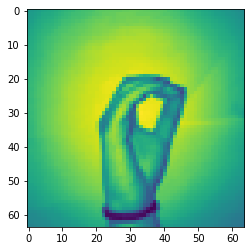

In [184]:
X = np.load('C:/Users/Rushad/Desktop/handsign-recog/data/X.npy')
Y = np.load('C:/Users/Rushad/Desktop/handsign-recog/data/Y.npy')

x = np.concatenate((X[204:409], X[822:1027] ), axis=0)
y = np.concatenate((np.zeros(205), np.ones(205)), axis=0).reshape(x.shape[0],1)

train_pct_index = int(0.8 * len(x))
x_train, x_test = x[:train_pct_index], x[train_pct_index:]
y_train, y_test = y[:train_pct_index].T, y[train_pct_index:].T

x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T

print ("train_set_x shape: " + str(x_train_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

plt.imshow(x_train[120])
print(y_train[0][120])

In [216]:
def para_init(dim, num_iterations):
    """
    Initialize parameters of LR
    """
    w = np.zeros(shape=(dim,1))*np.sqrt(1/num_iterations)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [186]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    a = 1/(1 + np.exp(-z))
    
    return a

In [187]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION
    A = sigmoid(np.dot(w.T, X) + b)

    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    # BACKWARD PROPAGATION
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [189]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    """
    
    costs = []
    
    for i in range(num_iterations):
        
    
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    global params
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [191]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

In [190]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=500, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model
    """
    w, b = para_init(x_train_flatten.shape[0], num_iterations)

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [218]:
d = model(x_train_flatten, y_train, x_test_flatten, y_test, num_iterations = 3000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.360039
Cost after iteration 200: 0.272093
Cost after iteration 300: 0.227592
Cost after iteration 400: 0.199815
Cost after iteration 500: 0.180453
Cost after iteration 600: 0.165966
Cost after iteration 700: 0.154573
Cost after iteration 800: 0.145280
Cost after iteration 900: 0.137483
Cost after iteration 1000: 0.130797
Cost after iteration 1100: 0.124962
Cost after iteration 1200: 0.119796
Cost after iteration 1300: 0.115169
Cost after iteration 1400: 0.110983
Cost after iteration 1500: 0.107166
Cost after iteration 1600: 0.103661
Cost after iteration 1700: 0.100423
Cost after iteration 1800: 0.097416
Cost after iteration 1900: 0.094612
Cost after iteration 2000: 0.091987
Cost after iteration 2100: 0.089521
Cost after iteration 2200: 0.087197
Cost after iteration 2300: 0.085001
Cost after iteration 2400: 0.082921
Cost after iteration 2500: 0.080947
Cost after iteration 2600: 0.079070
Cost after iteration 2700: 0.077281
Cost

Number shown is : 0


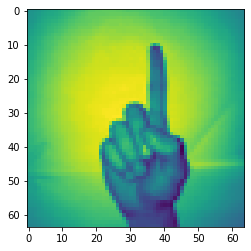

In [225]:
w = params['w']
b = params['b']
y_pred = sigmoid(np.dot(w.T, x_test[3].reshape(4096,1)))
print("Number shown is : " + str(round(int((y_pred)))))
plt.imshow(x_test[3])
plt.show()